In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from enefit_challenge.utils.dataset import load_enefit_training_data

In [2]:
df = load_enefit_training_data()
categorical_features = ['county', 'product_type']
df = pd.get_dummies(df, columns=categorical_features)

Feature importances from best LGBM trial so far (8/12/23)

In [3]:
import json
with open("0812_feature_importance_split.json") as f:
    importances = json.load(f)

feat_imp = pd.Series(importances)

feat_imp.describe(percentiles=[x/20 for x in range(1,20)])
feat_imp = feat_imp.reset_index(name="features")
feat_imp

,index,features
0,is_business,67
1,is_consumption,99
2,year,12
3,datediff_in_days,120
4,hour,148
...,...,...
75,county_15,1
76,product_type_0,22
77,product_type_1,36
78,product_type_2,12


In [4]:
df_filtered = df[feat_imp["index"]]

df_filtered.shape
df_filtered.describe()

,is_business,is_consumption,year,datediff_in_days,hour,hour_cosine,dayofweek,dayofweek_cosine,week,week_cosine,...,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f,surface_solar_radiation_downwards_std_f,snowfall_min_f,snowfall_mean_f,snowfall_max_f,snowfall_std_f,total_precipitation_min_f,total_precipitation_mean_f,total_precipitation_std_f
count,2.017824e+06,2017824.0,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,2.017824e+06,...,1.987088e+06,1.987088e+06,1.986478e+06,1.987088e+06,1.987088e+06,1.987088e+06,1.986478e+06,1.987088e+06,1.987088e+06,1.986478e+06
mean,5.368268e-01,0.5,2.022057e+03,3.218754e+02,1.150222e+01,-1.850272e-04,2.997336e+00,-3.739087e-04,2.612719e+01,1.239993e-01,...,1.096979e+02,1.270122e+02,1.299591e+01,7.341106e-06,2.622010e-05,6.612095e-05,2.017023e-05,1.888721e-05,7.808575e-05,6.836619e-05
std,4.986421e-01,0.5,6.452196e-01,1.826310e+02,6.921728e+00,7.071069e-01,1.998619e+00,7.066306e-01,1.593492e+01,6.650222e-01,...,1.832312e+02,2.038366e+02,2.625529e+01,5.324784e-05,1.051865e-04,2.220998e-04,6.770183e-05,9.545455e-05,2.127488e-04,1.796801e-04
min,0.000000e+00,0.0,2.021000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-9.009689e-01,1.000000e+00,-1.000000e+00,...,-1.826389e-01,-1.244444e-01,0.000000e+00,-3.814697e-06,-9.536743e-07,-2.384186e-07,0.000000e+00,-1.525879e-05,-7.599592e-06,0.000000e+00
25%,0.000000e+00,0.0,2.022000e+03,1.660000e+02,6.000000e+00,-7.071068e-01,1.000000e+00,-9.009689e-01,1.200000e+01,-4.647232e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.5,2.022000e+03,3.230000e+02,1.200000e+01,-1.836970e-16,3.000000e+00,-2.225209e-01,2.400000e+01,2.393157e-01,...,7.545679e-01,1.173377e+00,1.984715e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.633783e-06,5.937373e-06
75%,1.000000e+00,1.0,2.022000e+03,4.790000e+02,1.800000e+01,7.071068e-01,5.000000e+00,6.234898e-01,4.100000e+01,7.485107e-01,...,1.474623e+02,1.855123e+02,1.322982e+01,0.000000e+00,1.792917e-06,6.794930e-06,2.191636e-06,1.300941e-07,4.918961e-05,5.322532e-05
max,1.000000e+00,1.0,2.023000e+03,6.370000e+02,2.300000e+01,1.000000e+00,6.000000e+00,1.000000e+00,5.200000e+01,1.000000e+00,...,8.289692e+02,8.487144e+02,3.953976e+02,2.209962e-03,2.619924e-03,4.832983e-03,1.596776e-03,5.809307e-03,9.637594e-03,7.625545e-03


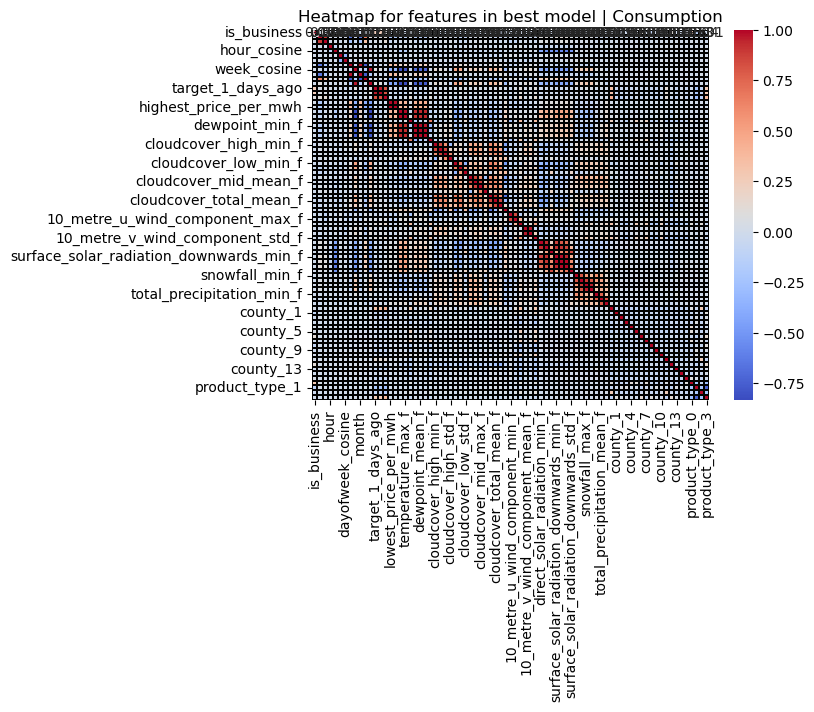

In [5]:
df_consumption = df_filtered[df_filtered["is_consumption"]==1].drop("is_consumption", axis=1)
df_production = df_filtered[df_filtered["is_consumption"]==0].drop("is_consumption", axis=1)

ax = sns.heatmap(df_consumption.fillna(0).corr(), annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=0.3)

plt.title("Heatmap for features in best model | Consumption")
plt.show()

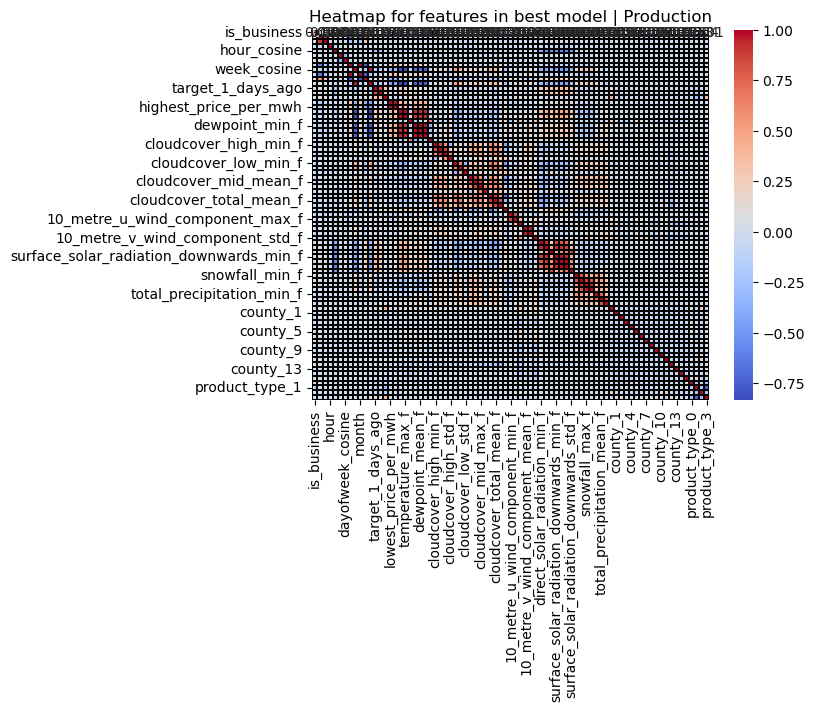

In [6]:
ax = sns.heatmap(df_production.fillna(0).corr(), annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=0.3)

plt.title("Heatmap for features in best model | Production")
plt.show()

In [7]:
correlation_matrix = df_consumption.fillna(0).corr()

# Set the threshold for correlation
threshold = 0.5

# Create a dictionary to store correlated features
correlation_dict = {}

# Iterate through columns (features)
for feature in correlation_matrix.columns:
    # Extract features with correlation greater than the threshold
    correlated_features = list(correlation_matrix[feature][abs(correlation_matrix[feature]) > threshold].index)
    
    # Remove the feature itself from the list
    correlated_features.remove(feature)
    
    # Store the list in the dictionary
    correlation_dict[feature] = correlated_features

# Print the dictionary
print("Correlation Dictionary:")
correlation_dict

Correlation Dictionary:


{'is_business': [],
 'year': ['datediff_in_days', 'week', 'month', 'month_sine'],
 'datediff_in_days': ['year'],
 'hour': [],
 'hour_cosine': ['direct_solar_radiation_mean_f',
  'direct_solar_radiation_std_f',
  'surface_solar_radiation_downwards_min_f',
  'surface_solar_radiation_downwards_mean_f',
  'surface_solar_radiation_downwards_max_f'],
 'dayofweek': [],
 'dayofweek_cosine': [],
 'week': ['year', 'month', 'month_sine'],
 'week_cosine': ['month_cosine',
  'temperature_mean_f',
  'temperature_max_f',
  'dewpoint_min_f',
  'dewpoint_mean_f',
  'dewpoint_max_f'],
 'month': ['year', 'week', 'month_sine'],
 'month_sine': ['year', 'week', 'month'],
 'month_cosine': ['week_cosine',
  'temperature_mean_f',
  'temperature_max_f',
  'dewpoint_min_f',
  'dewpoint_mean_f',
  'dewpoint_max_f'],
 'target_1_days_ago': ['target_7_days_ago', 'installed_capacity'],
 'target_7_days_ago': ['target_1_days_ago', 'installed_capacity'],
 'installed_capacity': ['target_1_days_ago', 'target_7_days_ago'],

In [8]:
df_correlation = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlated Features']).set_index('Feature')
df_correlation = df_correlation.join(feat_imp.set_index("index", drop=True))
df_correlation = df_correlation.rename(columns={"features":"feat_imp"})
df_correlation = df_correlation.sort_values(by="feat_imp", ascending=False)
df_correlation

,Correlated Features,feat_imp
Feature,,
target_1_days_ago,"[target_7_days_ago, installed_capacity]",316
target_7_days_ago,"[target_1_days_ago, installed_capacity]",288
installed_capacity,"[target_1_days_ago, target_7_days_ago]",284
dayofweek,[],197
hour,[],148
...,...,...
county_4,[],1
cloudcover_mid_std_f,[cloudcover_mid_max_f],1
county_9,[],0


We want to drop the feature if:
* the correlation list is not empty -> feature it's related to another at least at 50%
* if the list is not empty, all feautures in the list should have greater importance than the one in the index
* importance is zero

In [10]:
# Function to filter rows based on conditions
def custom_filter(row):
    correlated_features = row['Correlated Features']
    feat_imp_value = row['feat_imp']

    # Check if the list is not empty and feat_imp is greater than the max feat_imp in the correlated features
    if correlated_features and all(df_correlation.loc[feature, 'feat_imp'] > feat_imp_value for feature in correlated_features):
        return False  # Drop the row
    return True  # Keep the row

# Apply the custom filter function to drop rows
filtered_df_corr = df_correlation[df_correlation.apply(custom_filter, axis=1)]
# exclude feature with zero importance 
filtered_df_corr = filtered_df_corr[filtered_df_corr["feat_imp"]>0]
filtered_df_corr

,Correlated Features,feat_imp
Feature,,
target_1_days_ago,"[target_7_days_ago, installed_capacity]",316
target_7_days_ago,"[target_1_days_ago, installed_capacity]",288
dayofweek,[],197
hour,[],148
direct_solar_radiation_mean_f,"[hour_cosine, direct_solar_radiation_min_f, di...",128
datediff_in_days,[year],120
hour_cosine,"[direct_solar_radiation_mean_f, direct_solar_r...",119
dayofweek_cosine,[],107
surface_solar_radiation_downwards_mean_f,"[hour_cosine, temperature_max_f, direct_solar_...",102


In [11]:
dropped = set(df_correlation.index) - set(filtered_df_corr.index)
dropped

{'10_metre_u_wind_component_min_f',
 '10_metre_v_wind_component_max_f',
 '10_metre_v_wind_component_std_f',
 'cloudcover_high_mean_f',
 'cloudcover_high_std_f',
 'cloudcover_low_min_f',
 'cloudcover_low_std_f',
 'cloudcover_mid_std_f',
 'cloudcover_total_std_f',
 'county_12',
 'county_3',
 'county_9',
 'direct_solar_radiation_min_f',
 'direct_solar_radiation_std_f',
 'highest_price_per_mwh',
 'installed_capacity',
 'month_cosine',
 'product_type_3',
 'snowfall_max_f',
 'temperature_std_f',
 'total_precipitation_min_f',
 'total_precipitation_std_f',
 'year'}